In [1]:
import pandas as pd 
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
df1=pd.read_csv("reviews.csv",parse_dates=['Timestamp'])
df1.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


rating average by day/count

In [2]:
df1['Day']=df1['Timestamp'].dt.date
df1.head()
day_average=df1.groupby(['Day']).count()
day_average.head()

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


7

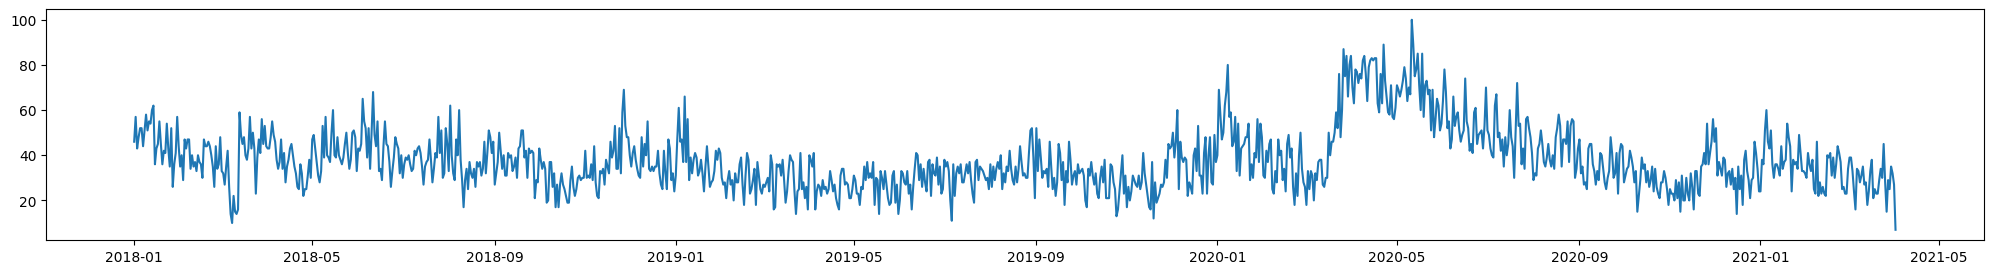

In [3]:
plt.figure(figsize=(25,3))
plt.plot(day_average.index,day_average['Rating'])
day_average['Rating'].min()

rating average by week

In [4]:
df1['Week']=df1['Timestamp'].dt.isocalendar().week
df1['Week']=df1['Timestamp'].dt.strftime('%Y-%U')
df1['Week']

0        2021-13
1        2021-13
2        2021-13
3        2021-13
4        2021-13
          ...   
44995    2018-00
44996    2018-00
44997    2018-00
44998    2018-00
44999    2018-00
Name: Week, Length: 45000, dtype: object

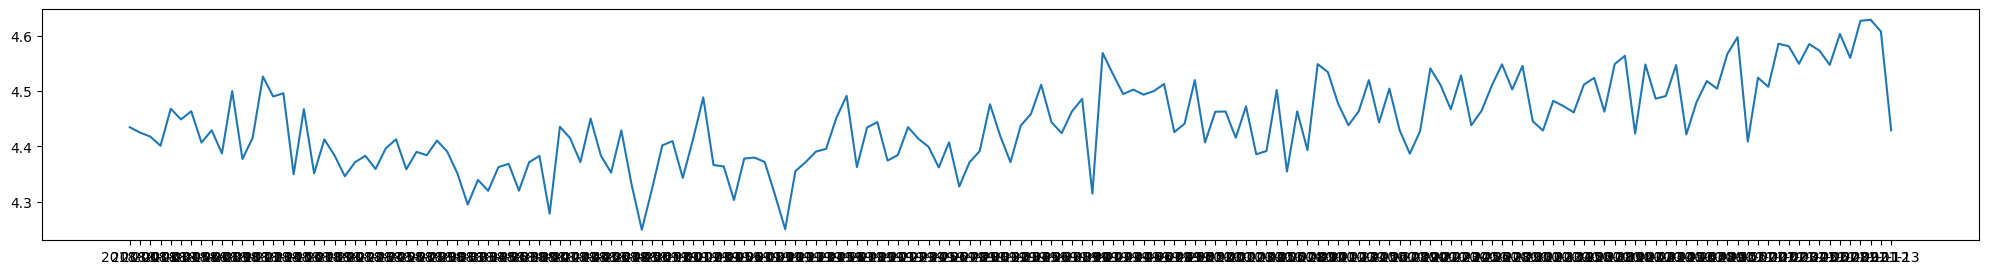

In [5]:
df1['Week']=df1['Timestamp'].dt.strftime('%Y-%U')
plt.figure(figsize=(25,3))
week_average=df1.groupby(['Week']).mean()
plt.plot(week_average.index,week_average['Rating'])

average rating by month

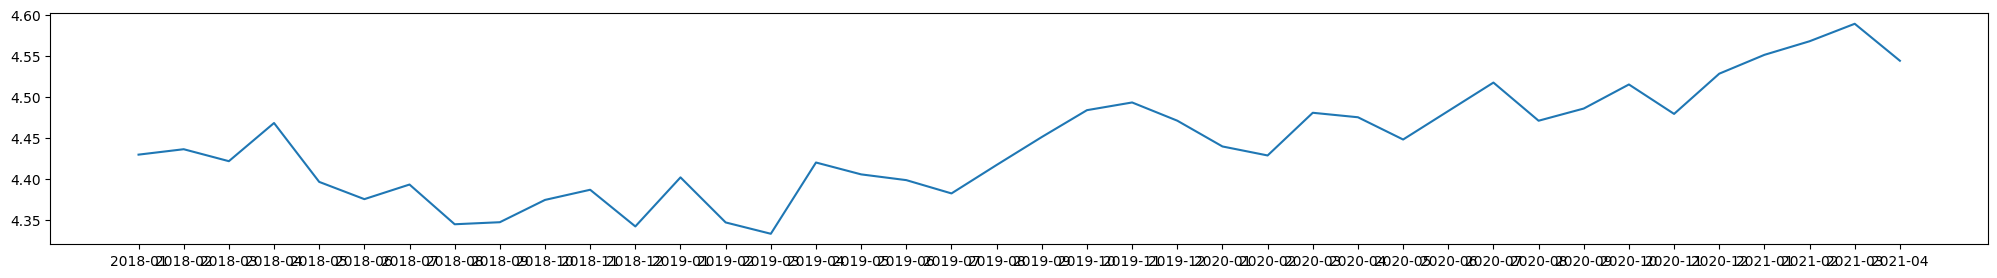

In [6]:
df1['Month']=df1['Timestamp'].dt.strftime('%Y-%m')
plt.figure(figsize=(25,3))
month_average=df1.groupby(['Month']).mean()
plt.plot(month_average.index,month_average['Rating'])

In [7]:
month_average.head()

,Rating
Month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420


average rating by month by course

<AxesSubplot:xlabel='Month'>

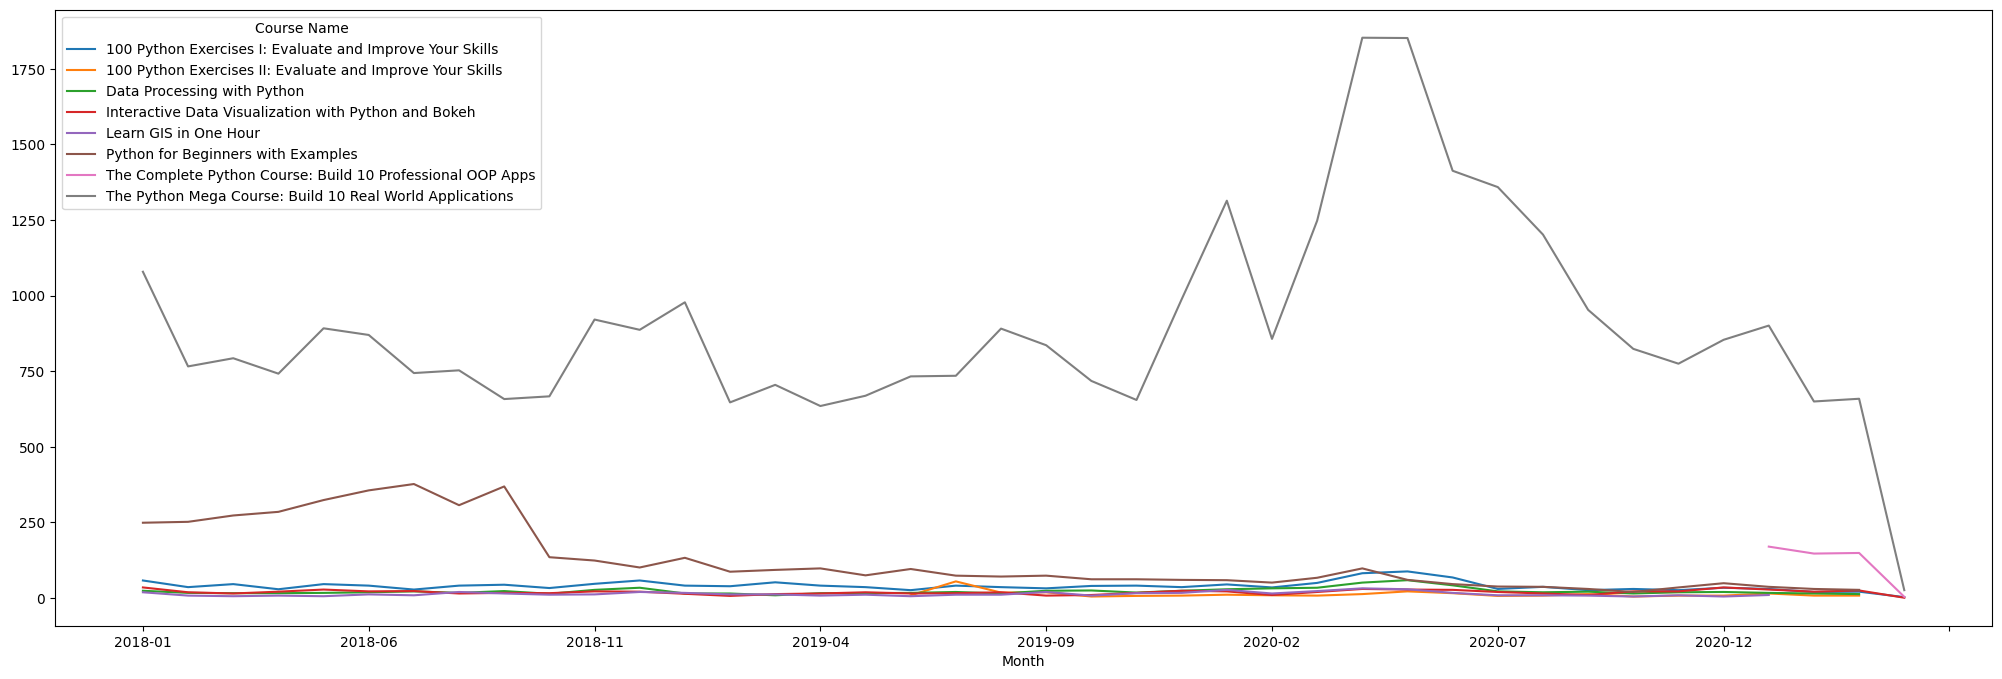

In [8]:
df1['Month'] = df1['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = df1.groupby(['Month', 'Course Name'])['Rating'].count().unstack()
month_average_crs.plot(figsize=(25,8))

what is the happiest day in the week

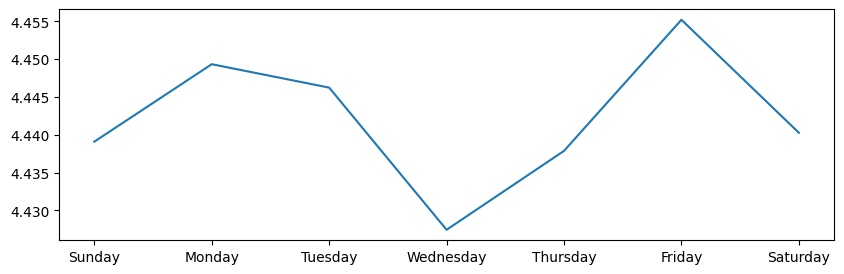

In [9]:
df1['Weekday']=df1['Timestamp'].dt.strftime('%A')
df1['Daynumber']=df1['Timestamp'].dt.strftime('%w')

weekDay_average=df1.groupby(['Weekday','Daynumber']).mean()
weekDay_average=weekDay_average.sort_values('Daynumber')
weekDay_average.index.get_level_values(0)
# weekDay_average.index
plt.figure(figsize=[10,3])
plt.plot(weekDay_average.index.get_level_values(0),weekDay_average['Rating'])

pie chart

number of rating by course

In [10]:
share=df1.groupby(['Course Name'])['Rating'].count()
share

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x16a5c3e4d60>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

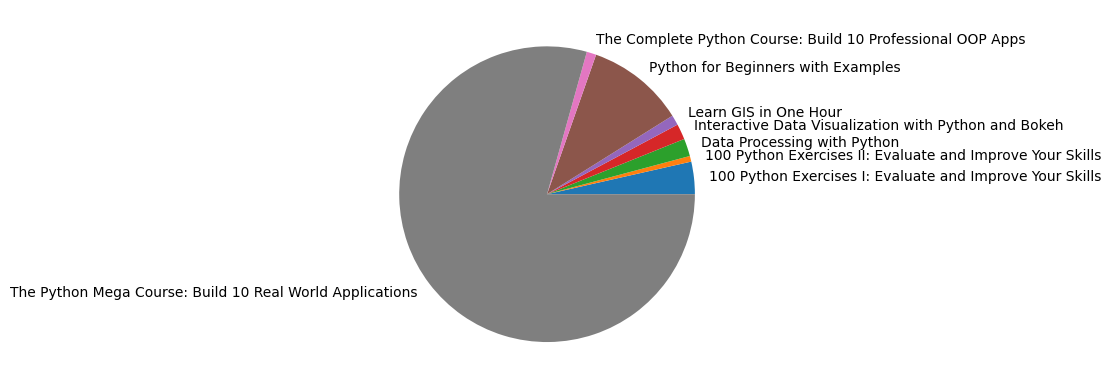

In [11]:
plt.pie(share,labels=share.index)